In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import itertools # Importando itertools para generar combinaciones de columnas
# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.patches as mpatches
import payments_manager as pm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
# Importa la función para crear la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#cr_cp = pm.df('cr_cp')
#fe_cp = pm.df('fe_cp')
df = pm.df('df_jo')
#display(df_jo)

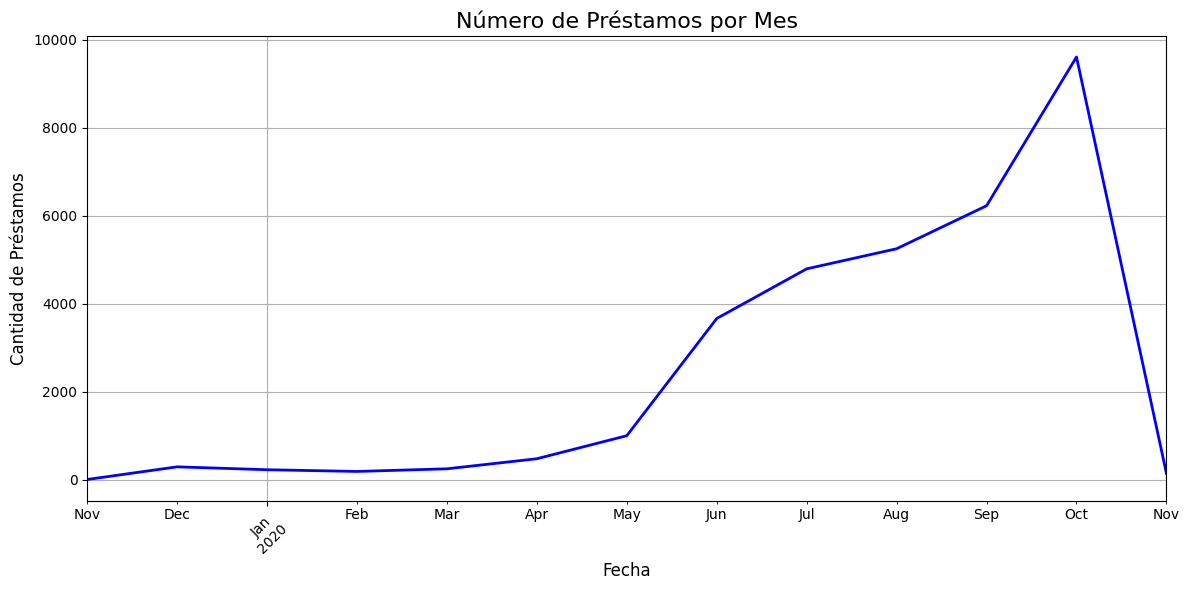

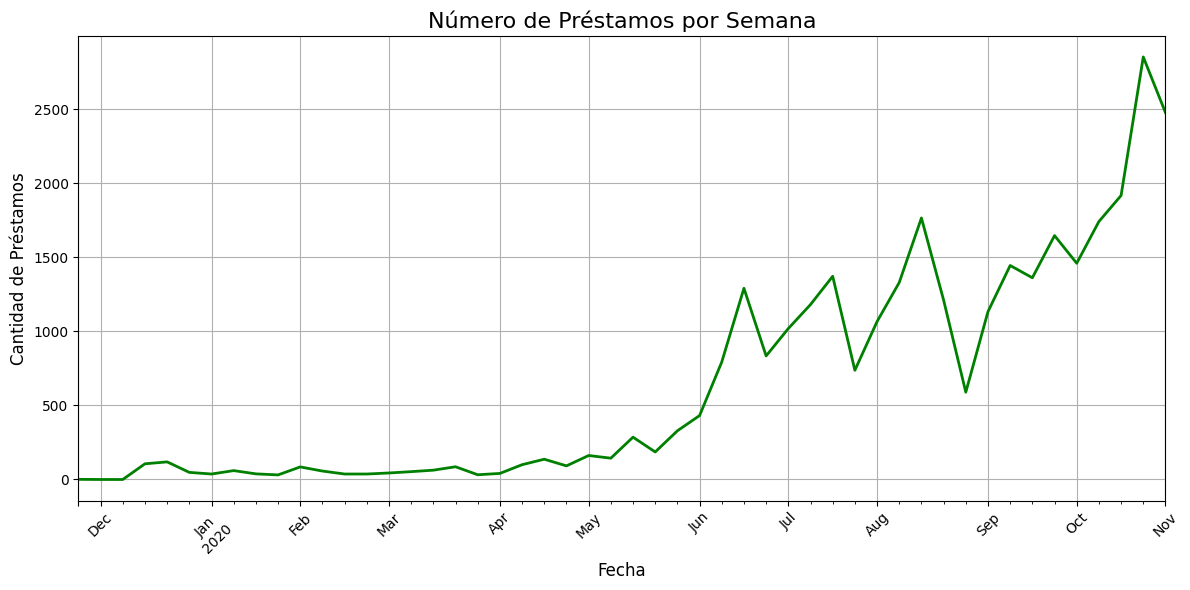

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que `created_at` esté en formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Agregar la cantidad de préstamos por mes
df_monthly = df.resample('ME', on='created_at').size()  # Resample por mes

# Graficar la cantidad de préstamos por mes
plt.figure(figsize=(12, 6))
df_monthly.plot(kind='line', color='blue', linewidth=2)
plt.title('Número de Préstamos por Mes', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Préstamos', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Agregar la cantidad de préstamos por semana
df_weekly = df.resample('W', on='created_at').size()  # Resample por semana

# Graficar la cantidad de préstamos por semana
plt.figure(figsize=(12, 6))
df_weekly.plot(kind='line', color='green', linewidth=2)
plt.title('Número de Préstamos por Semana', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Préstamos', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_51670/4131360281.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['week_of_year'] = df_valid['created_at'].dt.isocalendar().week


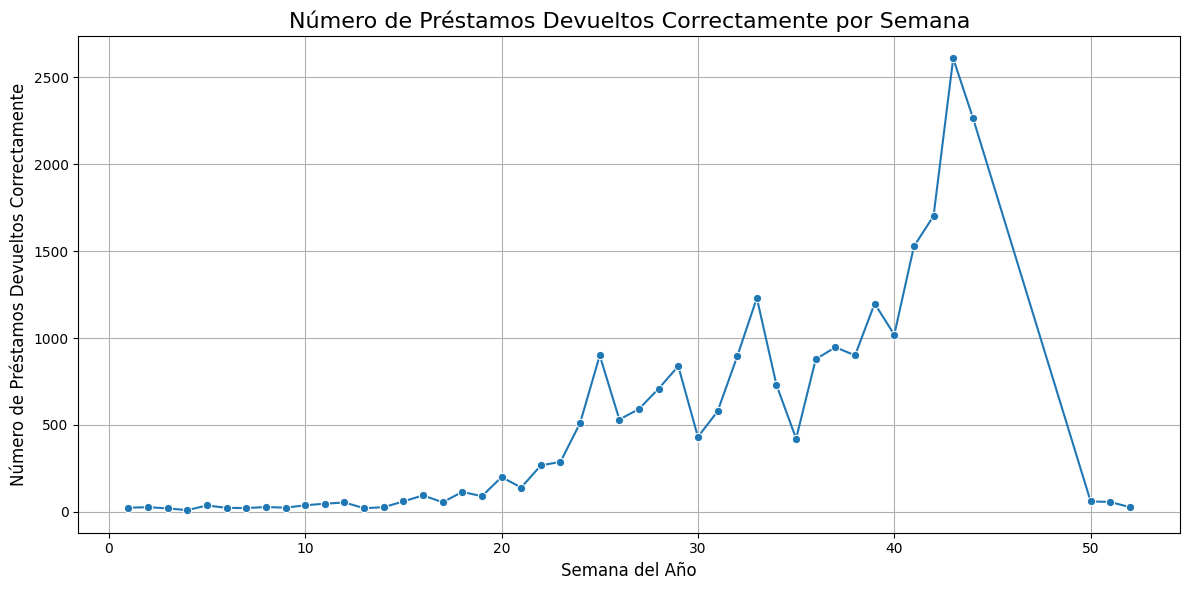

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que `created_at` esté en formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Filtrar los préstamos devueltos correctamente
# Ajusta según el valor real que indique que el préstamo ha sido devuelto correctamente
valid_principal_returned = ['approved', 'money_sent', 'money_back']  # Ejemplo de valores válidos

df_valid = df[df['stat_cr'].isin(valid_principal_returned)]

# Extraer el número de semana del año
df_valid['week_of_year'] = df_valid['created_at'].dt.isocalendar().week

# Contar los préstamos por cada semana
df_weekly_loans = df_valid.groupby('week_of_year').size().reset_index(name='loan_count')

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_weekly_loans, x='week_of_year', y='loan_count', marker='o')

# Ajustes del gráfico
plt.title('Número de Préstamos Devueltos Correctamente por Semana', fontsize=16)
plt.xlabel('Semana del Año', fontsize=12)
plt.ylabel('Número de Préstamos Devueltos Correctamente', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


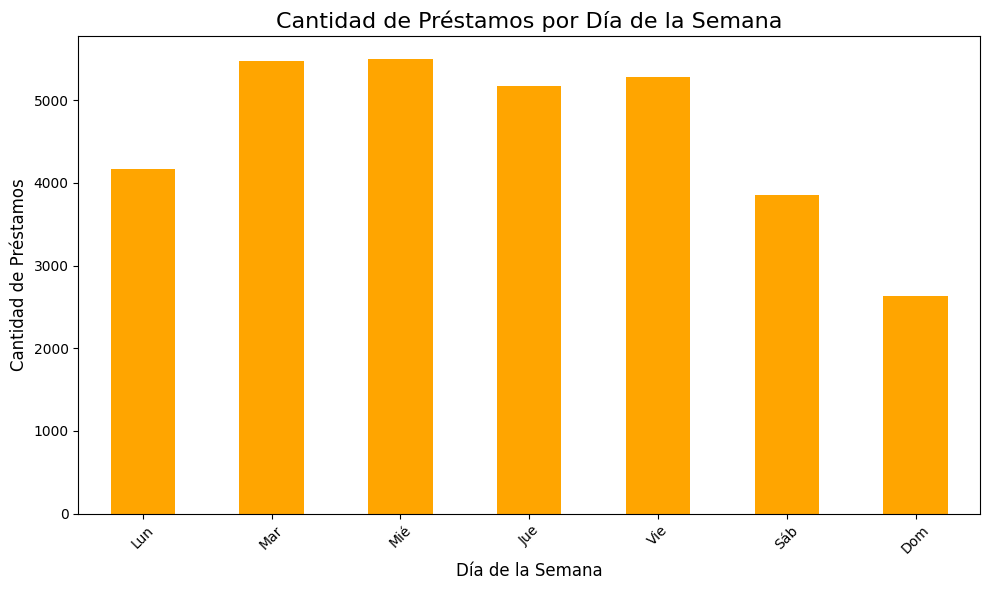

In [7]:
# Agregar la columna `day_of_week` (día de la semana)
df['day_of_week'] = df['created_at'].dt.dayofweek

# Contar los préstamos por día de la semana
df_day_of_week = df.groupby('day_of_week').size()

# Graficar la cantidad de préstamos por día de la semana
plt.figure(figsize=(10, 6))
df_day_of_week.plot(kind='bar', color='orange')
plt.title('Cantidad de Préstamos por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Cantidad de Préstamos', fontsize=12)
plt.xticks(ticks=range(7), labels=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'], rotation=45)
plt.tight_layout()
plt.show()


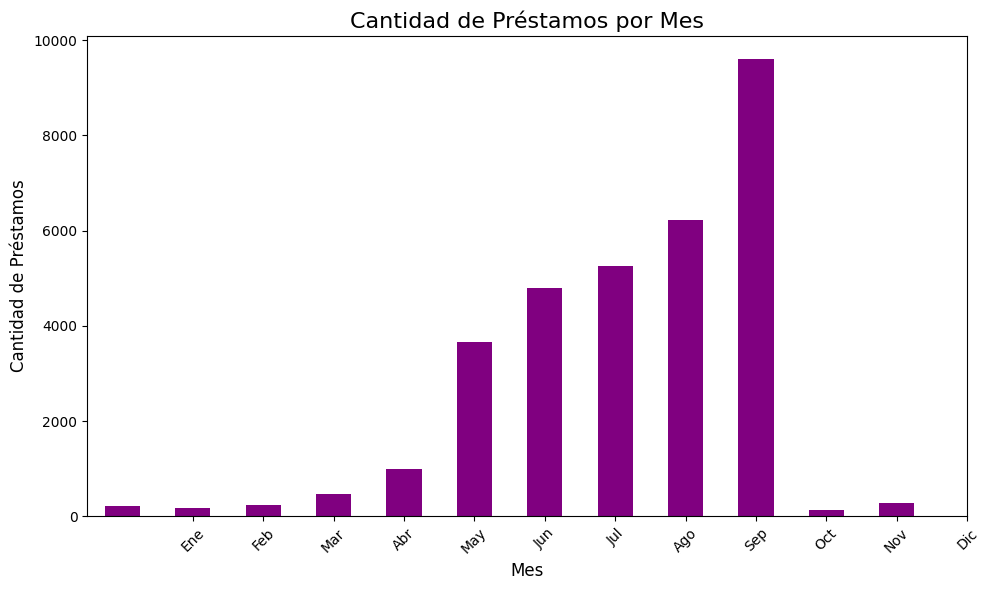

In [8]:
# Agregar la columna `month` (mes del año)
df['month'] = df['created_at'].dt.month

# Contar los préstamos por mes
df_month = df.groupby('month').size()

# Graficar la cantidad de préstamos por mes
plt.figure(figsize=(10, 6))
df_month.plot(kind='bar', color='purple')
plt.title('Cantidad de Préstamos por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Préstamos', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
plt.tight_layout()
plt.show()


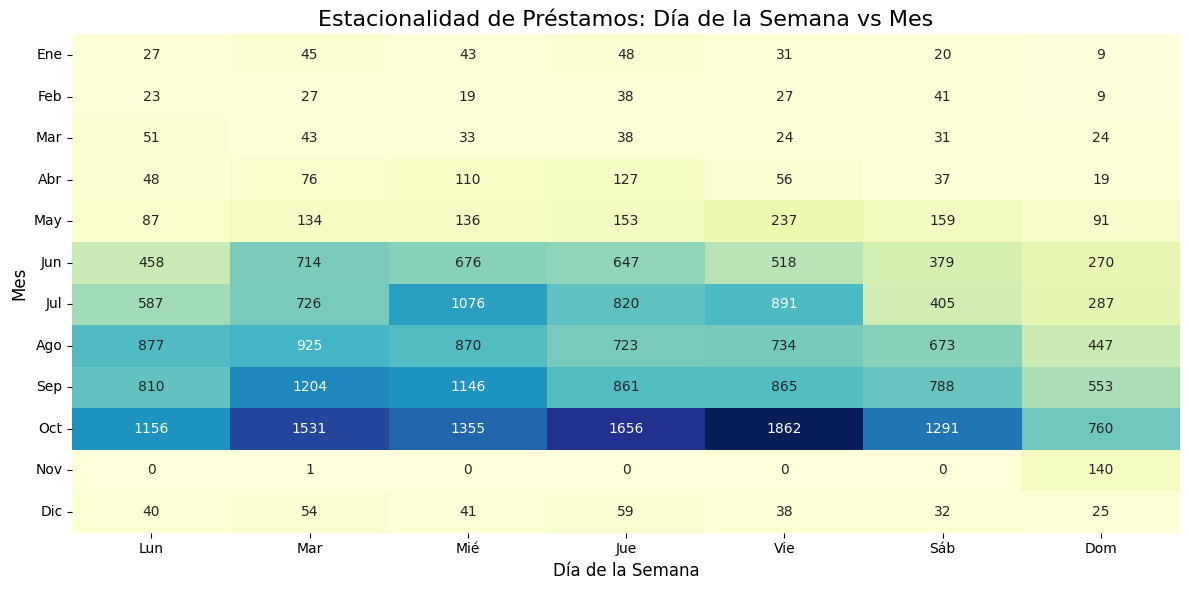

In [9]:
import numpy as np

# Crear una matriz de días de la semana vs. meses
df['month'] = df['created_at'].dt.month
df['day_of_week'] = df['created_at'].dt.dayofweek

# Contar los préstamos por mes y día de la semana
df_heatmap = df.groupby(['month', 'day_of_week']).size().unstack(fill_value=0)

# Graficar un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, cmap='YlGnBu', annot=True, fmt='d', cbar=False)
plt.title('Estacionalidad de Préstamos: Día de la Semana vs Mes', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Mes', fontsize=12)
plt.xticks(ticks=np.arange(7) + 0.5, labels=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.yticks(ticks=np.arange(12) + 0.5, labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.tight_layout()
plt.show()


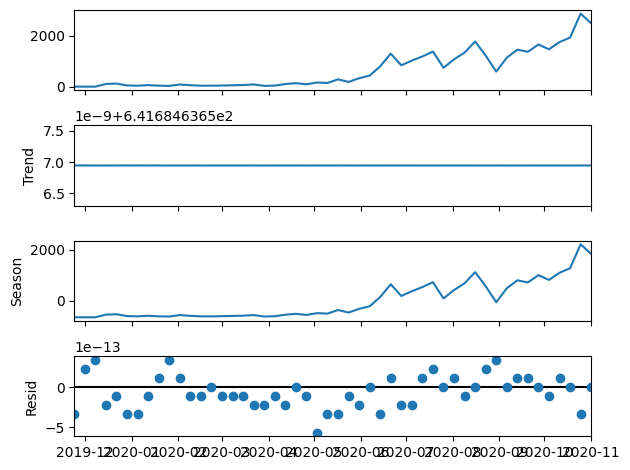

In [20]:
from statsmodels.tsa.seasonal import STL

# Descomponer la serie temporal mensual
stl = STL(df_weekly, seasonal=13)  # 13 para datos mensuales
result = stl.fit()

# Graficar la descomposición
result.plot()
plt.show()


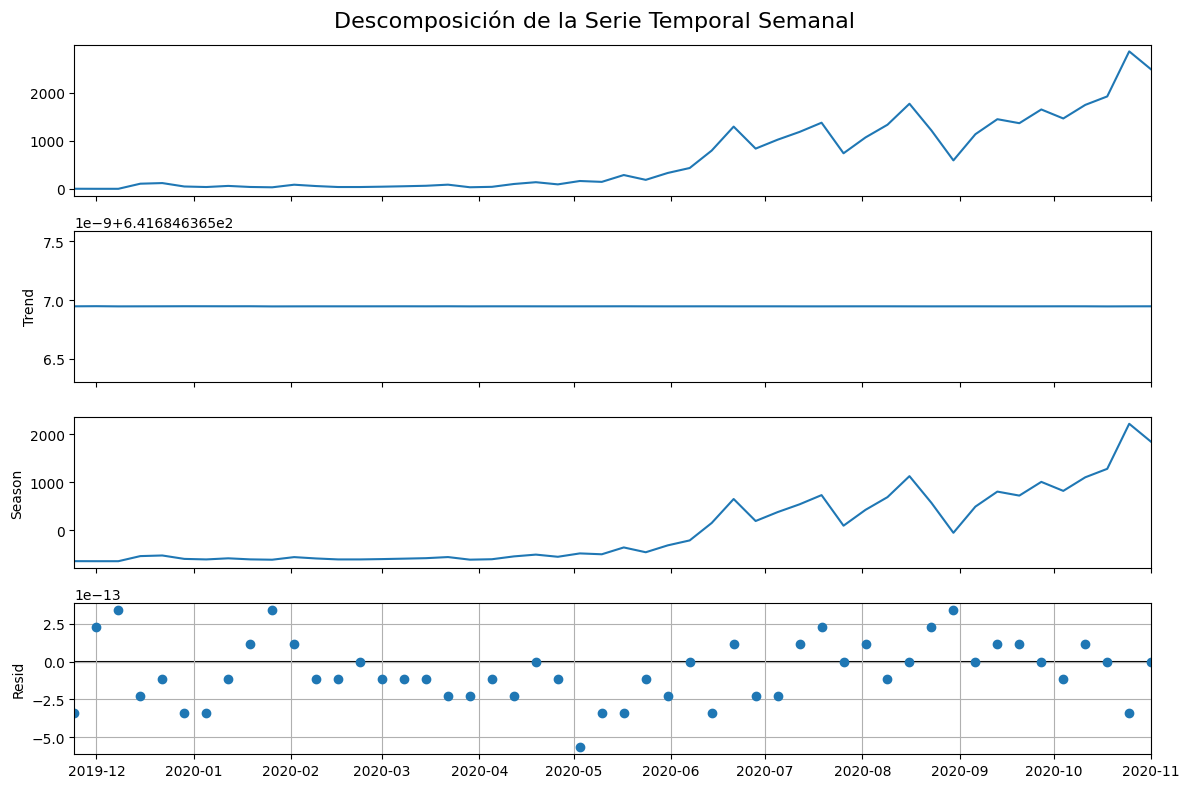

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Asegurarnos de que `created_at` esté en formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Agrupar los datos por semana, contando la cantidad de préstamos por semana
df_weekly = df.resample('W', on='created_at').size()

# Aplicar la descomposición STL (Seasonal and Trend decomposition using LOESS)
stl = STL(df_weekly, seasonal=13)  # Usamos 13 para capturar la estacionalidad semanal
result = stl.fit()

# Graficar la descomposición
fig = result.plot()
fig.set_size_inches((12, 8)) 
plt.grid()
plt.suptitle('Descomposición de la Serie Temporal Semanal', fontsize=16)
plt.tight_layout()
plt.show()



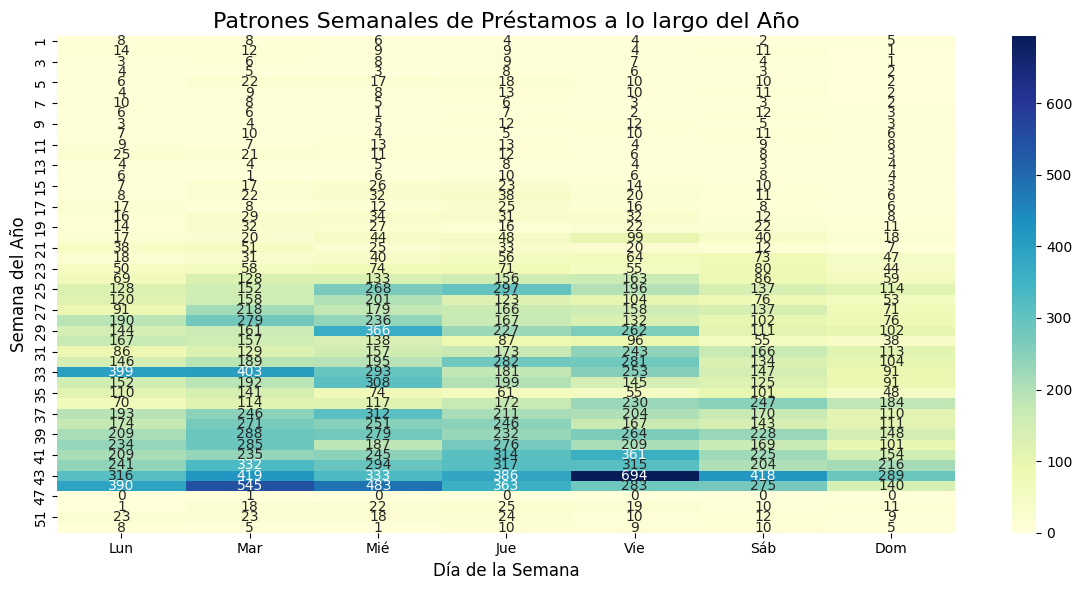

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Asegurarnos de que `created_at` esté en formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extraer la semana del año (semana del año de `created_at`)
df['week_of_year'] = df['created_at'].dt.isocalendar().week

# Extraer el día de la semana (0: lunes, 1: martes, ..., 6: domingo)
df['day_of_week'] = df['created_at'].dt.dayofweek

# Contar los préstamos por cada combinación de semana del año y día de la semana
df_heatmap = df.groupby(['week_of_year', 'day_of_week']).size().unstack(fill_value=0)

# Crear un gráfico de calor para visualizar los patrones semanales del año
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, cmap='YlGnBu', annot=True, fmt='d', cbar=True)

# Ajustar el gráfico
plt.title('Patrones Semanales de Préstamos a lo largo del Año', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Semana del Año', fontsize=12)
plt.xticks(ticks=np.arange(7) + 0.5, labels=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.tight_layout()
plt.show()


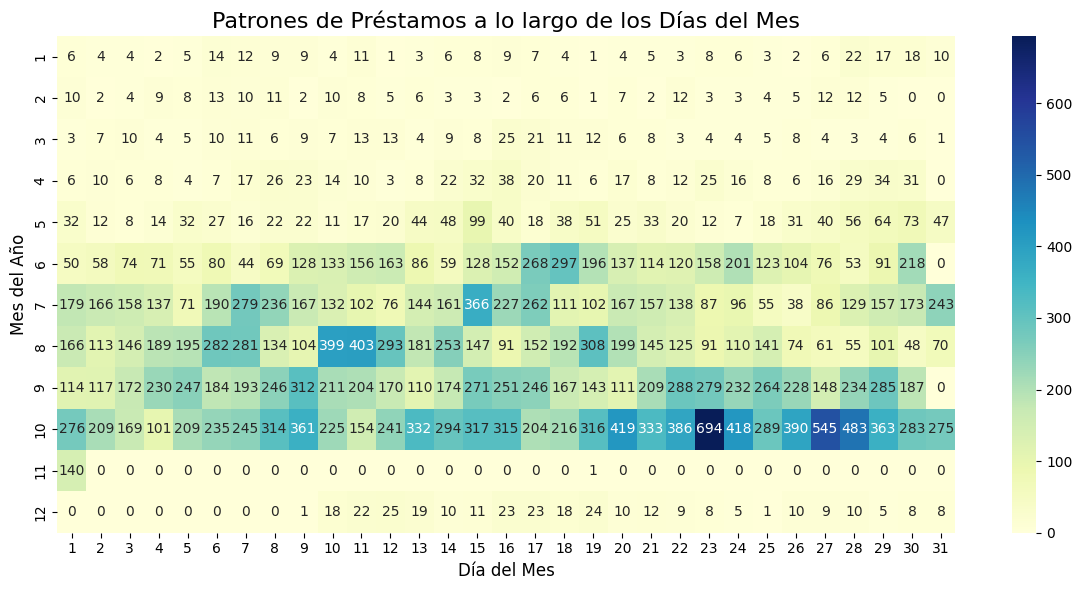

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Asegurarnos de que `created_at` esté en formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extraer el día del mes
df['day_of_month'] = df['created_at'].dt.day

# Extraer el mes del año
df['month_of_year'] = df['created_at'].dt.month

# Contar los préstamos por cada combinación de mes y día del mes
df_heatmap_month = df.groupby(['month_of_year', 'day_of_month']).size().unstack(fill_value=0)

# Crear un gráfico de calor para visualizar los patrones por día del mes
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap_month, cmap='YlGnBu', annot=True, fmt='d', cbar=True)

# Ajustar el gráfico
plt.title('Patrones de Préstamos a lo largo de los Días del Mes', fontsize=16)
plt.xlabel('Día del Mes', fontsize=12)
plt.ylabel('Mes del Año', fontsize=12)
plt.xticks(ticks=np.arange(31) + 0.5, labels=np.arange(1, 32))
plt.tight_layout()
plt.show()


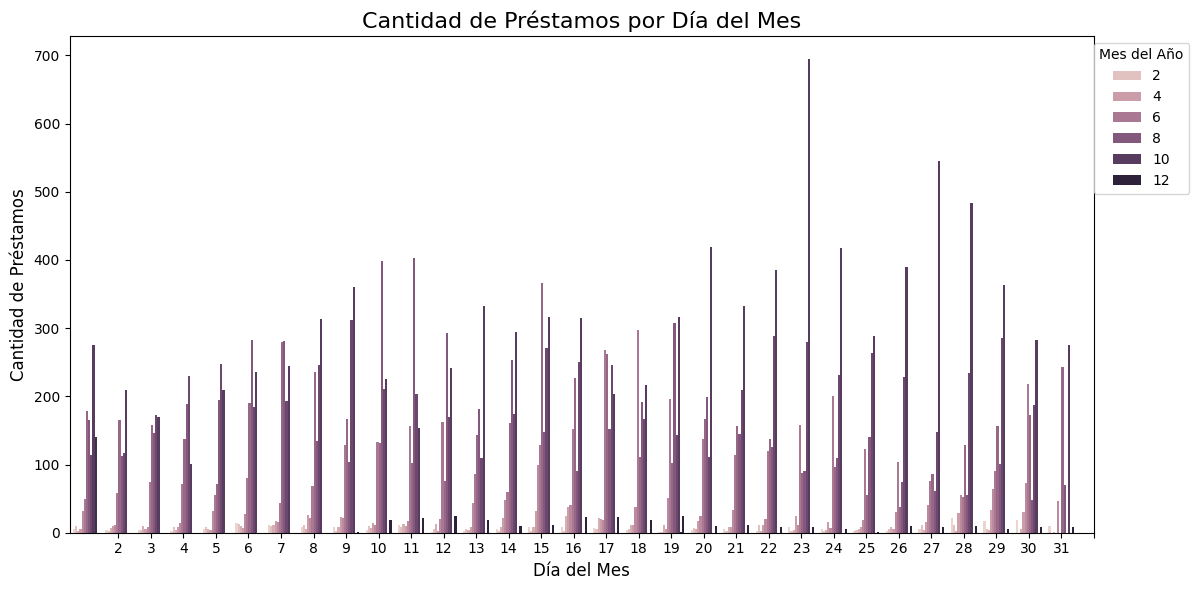

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que `created_at` esté en formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extraer el día del mes y el mes del año
df['day_of_month'] = df['created_at'].dt.day
df['month_of_year'] = df['created_at'].dt.month

# Contar los préstamos por cada combinación de mes y día del mes
df_counts = df.groupby(['month_of_year', 'day_of_month']).size().reset_index(name='loan_count')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))

# Usamos seaborn para un gráfico de barras agrupadas
sns.barplot(data=df_counts, x='day_of_month', y='loan_count', hue='month_of_year', dodge=True)

# Ajustar el gráfico
plt.title('Cantidad de Préstamos por Día del Mes', fontsize=16)
plt.xlabel('Día del Mes', fontsize=12)
plt.ylabel('Cantidad de Préstamos', fontsize=12)
plt.xticks(range(1, 32))  # Mostrar los días del mes del 1 al 31
plt.legend(title='Mes del Año', loc='upper right', bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.show()
